## Relative Performance comparison in Neural Networks for Aquatic Toxicity Prediction 

###                       Comparing change across ( Nodes, Hidden Layers, Computational Effort)

In [153]:
#importing libraries
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from tensorflow import keras
from tensorflow.keras import layers

from keras.optimizers import SGD
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.constraints import maxnorm

#plot
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)

print("Tensor Flow Version Used : ", tf.__version__)

Tensor Flow Version Used :  2.1.0


In [129]:
#Reading the Data
toxic_data = pd.read_csv (r'QSAR.csv')

### Data Set Description

This dataset is used to solve a function approximation regression problem using keras feed forward neural network
models to predict acute aquatic toxicity towards the fish Pimephales promelas (fathead minnow) on a set of 908 chemicals, to predict acute aquatic toxicity towards Daphnia Magna. LC50 data, which is the concentration that causes death in 50% of test D. magna over a test duration of 48 hours, was used as model response. The model comprised 8 molecular descriptors: TPSA(Tot) (Molecular properties) , SAacc (Molecular properties), H-050 (Atom-centred fragments), MLOGP (Molecular properties),
RDCHI (Connectivity indices), GATS1p (2D autocorrelations), nN (Constitutional indices), C-040 (Atom-centred fragments).

#### Data set containing values for 8 attributes (molecular descriptors) of 546 chemicals used to predict quantitative acute aquatic toxicity towards the fish "Daphnia Magna"

 #### The target variable Y is "LC50" which is concerntration of toxicity that causes the death of fish(fathead minnow)

the data set consists of 908 observations for 6 attributes namely "CIC0, SM1_Dz, GATS1i, NdsCH, NdssC, MLOGP" and 1 dependent vairable Y "Y_LC50"


In [130]:
# Toxicity value ranges from 0.053 to 9.61
#The below tables gives the statstics of all the other variables

toxic_data.describe()

,CIC0,SM1_Dz,GATS1i,NdsCH,NdssC,MLOGP,Y_LC50
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,0.229075,0.485683,2.109285,4.064431
std,0.756088,0.428459,0.394303,0.605335,0.861279,1.433181,1.455698
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.347000,0.223000,0.950750,0.000000,0.000000,1.209000,3.151750
50%,2.934000,0.570000,1.240500,0.000000,0.000000,2.127000,3.987500
75%,3.407000,0.892750,1.562250,0.000000,1.000000,3.105000,4.907500
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


In [3]:
#Splitting the dataset into train and test
train_dataset = toxic_data.sample(frac=0.7,random_state=0)
test_dataset = toxic_data.drop(train_dataset.index)

In [4]:
train_des = toxic_data.describe()
train_des.pop("Y_LC50")
train_des = train_des.transpose()
train_des

,count,mean,std,min,25%,50%,75%,max
CIC0,908.0,2.898129,0.756088,0.667,2.34700,2.9340,3.40700,5.926
SM1_Dz,908.0,0.628468,0.428459,0.000,0.22300,0.5700,0.89275,2.171
GATS1i,908.0,1.293591,0.394303,0.396,0.95075,1.2405,1.56225,2.920
NdsCH,908.0,0.229075,0.605335,0.000,0.00000,0.0000,0.00000,4.000
NdssC,908.0,0.485683,0.861279,0.000,0.00000,0.0000,1.00000,6.000
MLOGP,908.0,2.109285,1.433181,-2.884,1.20900,2.1270,3.10500,6.515


In [5]:
# extracting label values/Y variable "Y_LC50" i.e. acute aquatic toxicity

train_labels = train_dataset.pop('Y_LC50')
test_labels = test_dataset.pop('Y_LC50')

In [131]:
#normalizing the dataset (performs better for neural network inputs)
def norm(x):
    return (x - train_des['mean']) / train_des['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [132]:
X_train = normed_train_data
y_train = train_labels
X_test = normed_test_data
y_test = test_labels

## Comparing relative performance changing number of nodes and hidden layers using Hyperparameter Tuning

### Performance by Number of Neurons

In [161]:
#creating a network with 1 hidden layers d-d-1
def create_model_neurons(neurons=6):
# create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=len(train_dataset.keys()), activation='relu'))
    model.add(Dense(1, activation='relu'))
	# Compile model
    model.compile(loss='mse', optimizer='SGD', metrics=['mse'])
    return model

In [162]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasRegressor(build_fn=create_model_neurons, epochs=100, batch_size=10, verbose=0)

### Evaluating performance of the network by changing number of neurons 6,12,24,30,36,42

In [169]:
# define the grid search parameters for neurons 6,12,24,30,36,42
neurons = [6,12,24,30,36,42]
mse_neurons = []
no_neurons=[]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (np.sqrt(grid_result.best_score_*grid_result.best_score_), grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    mse_neurons.append(np.sqrt(mean*mean))
    print("%f (%f) with: %r" % (np.sqrt(mean*mean), stdev, param))

Best: 0.836946 using {'neurons': 30}
0.962873 (0.060695) with: {'neurons': 6}
0.928381 (0.170928) with: {'neurons': 12}
0.912529 (0.050403) with: {'neurons': 24}
0.836946 (0.085153) with: {'neurons': 30}
0.960984 (0.181567) with: {'neurons': 36}
0.847139 (0.114967) with: {'neurons': 42}


#### The best model performs with 30 neurons resulting in a mean squared error of 0.83

In [170]:
mse_neurons

[0.9628731450007396,
 0.9283810219955894,
 0.9125292938460344,
 0.836945627165853,
 0.9609839717547098,
 0.8471387416686652]

In [171]:
neurons

[6, 12, 24, 30, 36, 42]

### Evaluating performance of the network by changing number of hidden layers 1,2,3,4,5,6

In [172]:
#creating a network for hidden layers tuning
def create_model_layer(neurons=6, hidden_layers=1):
# create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=len(train_dataset.keys()), activation='relu'))
    for i in range(hidden_layers):
      # Add hidden layer based on input
      model.add(Dense(neurons, activation='relu'))

    model.add(Dense(1, activation='relu'))
	# Compile model
    model.compile(loss='mse', optimizer='SGD', metrics=['mse'])
    return model

In [173]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model2 = KerasRegressor(build_fn=create_model_layer, epochs=100, batch_size=10, verbose=0)

In [174]:
# tuning grid search across layers 1,2,3,4,5,6
hidden_layers = [0,1,2,3,4,5,6]
mse_layers=[]
no_layers=[]
param_grid = dict(hidden_layers=hidden_layers)
grid = GridSearchCV(estimator=model2, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (np.sqrt(grid_result.best_score_*grid_result.best_score_), grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    mse_layers.append(np.sqrt(mean*mean))
#     no_layers.append(param.values())
    print("%f (%f) with: %r" % (np.sqrt(mean*mean), stdev, param))

Best: 0.856373 using {'hidden_layers': 2}
0.946070 (0.091349) with: {'hidden_layers': 0}
0.877834 (0.146870) with: {'hidden_layers': 1}
0.856373 (0.104337) with: {'hidden_layers': 2}
1.100777 (0.403832) with: {'hidden_layers': 3}
0.876124 (0.154052) with: {'hidden_layers': 4}
12.100048 (7.786440) with: {'hidden_layers': 5}
12.004203 (7.921192) with: {'hidden_layers': 6}


#### The best model performs with 2 hidden layers resulting in Mean Squared Error of 0.85

No handles with labels found to put in legend.


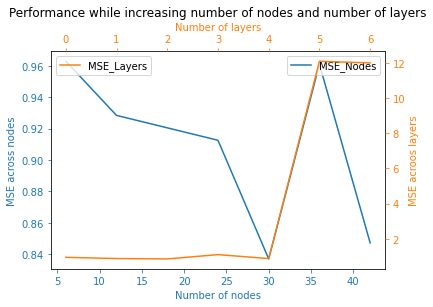

In [200]:
#plotting curves - increasing number of weights and neurons across performance evaluation mean squared error
import matplotlib.pyplot as plt

x_values1=neurons
y_values1=mse_neurons

x_values2=hidden_layers
y_values2=mse_layers


fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)


ax.plot(x_values1, y_values1, color="C0")
ax.set_xlabel("Number of nodes", color="C0")
ax.set_ylabel("MSE across nodes", color="C0")
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")


ax2.plot(x_values2, y_values2, color="C1")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel('Number of layers', color="C1") 
ax2.set_ylabel('MSE acroos layers', color="C1")       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")
ax2.legend()

ax.legend(['MSE_Nodes'], loc='upper right')
ax2.legend(['MSE_Layers'], loc='upper left')
plt.title("Performance while increasing number of nodes and number of layers")
plt.show()

##### Answer 1
##### (i) Does increasing the number of weights help? 
##### Ans(i) It depends on the problem statement, in this particular usecase increasing number of weights helped upto a certain value. In this case increasing number of neurons from (6 to 42) which corresponds to increase in weights resulted in better mse score in this particular problem statement i.e. performed best with 30 neurons resulting in a mse of 0.83, but their is no particular pattern that increasing number of neurons will definetly lead to better performance

##### (ii) Does increasing the number of layers help?  
###### Ans(ii)It depends on the problem statement,in this particular usecase increasing number of layers helped since increasing number of hidden layers from (1 to 6) resulted in better mse score in this particular problem statement i.e. performed best with 2 hidden layers resulting in a mse of 0.85, but their is no pattern that increasing in number of hidden layer will definelty lead to better performance

## 2. Performance Comparison after large number of computation (epochs)

We will used the best parameters evaluated in part 1 (number of neurons and number of hidden layers) of the assignment to further tune the model solving the questions in part 2 to evaluate model performance comparison and computational effort

### Evaluating performance across large number of comuptational epochs 

In [201]:
#creating model for tuning large number of computation evaluation
def create_model_epoch(epochs=10):
# create model
    model = Sequential()
    model.add(Dense(6, input_dim=len(train_dataset.keys()), activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1, activation='relu'))
	# Compile model
    model.compile(loss='mse', optimizer='SGD', metrics=['mse'])
    return model

In [188]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model_epoch = KerasRegressor(build_fn=create_model_epoch, epochs=100, batch_size=10, verbose=0)

In [189]:
#defining tune grid for epoch computations 10,50,100,150,300,400,500
epochs = [10, 50,100,150,300,400,500]
epoch_list=[]
mse_epochs = []
param_grid = dict(epochs=epochs)
grid = GridSearchCV(estimator=model_epoch, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (np.sqrt(grid_result.best_score_*grid_result.best_score_), grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    epoch_list.append(param)
    mse_epochs.append(np.sqrt(mean*mean))
    print("%f (%f) with: %r" % (np.sqrt(mean*mean), stdev, param))

Best: 0.879161 using {'epochs': 150}
1.027155 (0.208367) with: {'epochs': 10}
6.192617 (7.313293) with: {'epochs': 50}
6.737659 (8.397320) with: {'epochs': 100}
0.879161 (0.158170) with: {'epochs': 150}
1.095245 (0.279703) with: {'epochs': 300}
0.973497 (0.271709) with: {'epochs': 400}
1.140131 (0.108779) with: {'epochs': 500}


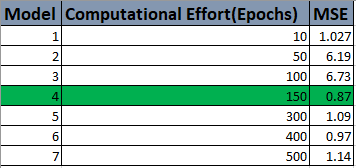

##### Answer 2
##### a) Best results obtained after a large number of computations
##### The best model performs best with 181950  weight updates (150 epochs) resulting in Mean Squared Error of 0.87

In [190]:
s = create_model_epoch()
s.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_107 (Dense)            (None, 6)                 42        
_________________________________________________________________
dense_108 (Dense)            (None, 30)                210       
_________________________________________________________________
dense_109 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_110 (Dense)            (None, 1)                 31        
Total params: 1,213
Trainable params: 1,213
Non-trainable params: 0
_________________________________________________________________


### b)	Computational effort required to get satisfactory results i.e. MSE = 0.87

In [196]:
computaional_effort = []
for i in epochs:
    computaional_effort.append(i*1213) 

In [197]:
computaional_effort

[12130, 60650, 121300, 181950, 363900, 485200, 606500]

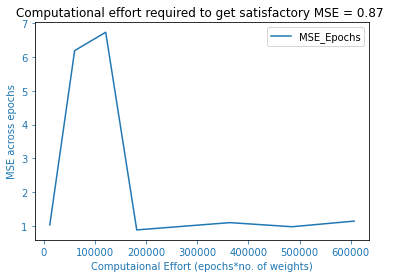

In [199]:
#plotting computational effort required to reach satisfactory MSE = 0.87
x_values4=computaional_effort
y_values4=mse_epochs


fig=plt.figure()
ax=fig.add_subplot(111, label="1")



ax.plot(x_values4, y_values4, color="C0")
ax.set_xlabel("Computaional Effort (epochs*no. of weights)", color="C0")
ax.set_ylabel("MSE across epochs", color="C0")
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")

ax.legend(['MSE_Epochs'], loc='upper right')
plt.title("Computational effort required to get satisfactory MSE = 0.87 ")
plt.show()

##### The computational effort required for reaching 0.87 MSE is 181950

### Solution 1
##### From the above sets of experiments we can conclude that for a neural network increasing number of nodes and layers will
##### help in improving performance but needs to be tuned as an excessive increase in those parameters sometimes deteriorates 
##### performance as while tuning the number of neurons across 6-42 nodes resulted in a trade-off in 30 neurons and tuning 
##### hidden layers across 1-6 resulted in this trade-off in 2 hidden layers performing best of this particular use case. This 
##### reveals the importance of tuning and training models as per the hyperparameters to obtain the best results.
### Solution 2
##### The set of experiments in part 2 proved that model performance may vary while increasing the number of computations 
##### i.e. weight updates across epochs, in this use case we see that performance improves up to 181950 weight updates but
##### the performance does not improve after that showing that a large number of weight updates could result in a model to 
##### escape the global minima and perform poorly later



## Conclusion
#### The two solutions stated above proves that for a neural network increasing number of neurons, hidden layers and
#### computations will not always improve the performance but the idea is to arrive at a trade off tuning the required 
#### parameters involved with the neural network architecture that could result in the best performance based on the 
#### complexity of the problem statement

## References
#### Dataset : https://archive.ics.uci.edu/ml/datasets/QSAR+aquatic+toxicity
#### Tensorflow : https://www.tensorflow.org/api_docs
#### Keras : https://keras.io/api/models/sequential/